# What should I expect when considering different room types on Airbnb? --Data Analysis of Airbnb Boston listings

# Introduction

This project is the first project of the Udacity Data Scientist Nano Degree program. I am going to apply the CRISP-DM process to write a data science blog post.

CRISP-DM (Cross Industry Process for Data Mining) is a process model with six phases that naturally describes the data science life cycle. It consists of 6 phases:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deploy

However, the 6 phases aren't necessary for all the projects; a lot of questions can be answered without building models. In this post, I will apply CRISP-DM steps 1,2,3,5, and 6 to the Airbnb Boston datasets. The dataset is available on Inside Airbnb, an independent, non-commercial website that allows you to explore how Airbnb is really being used in cities around the world:: http://insideairbnb.com/get-the-data.html. 

# 1. Business Understanding

Boston is one of the most visited cities in the world. I will discuss some questions that those who plan to travel to Boston and consider Airbnb would care about.
1. How many rooms are available in each of the communities? How many entire apartments and private rooms are there in each community?
2. What are the differences between the amenities provided by the entire apartment and the private room?
3. How much does one person have to pay in each community? Is an entire apartment more expensive? 
4. How much more does a person need to pay to book a private room with a private bathroom?

# 2. Data Understanding

There are four separate CSV files available on Inside Airbnb: listing, calendar, review, and neighborhood. However, I will **only focus on listing dataset** today, that is, the detailed listings data for Boston

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import locale ##used to convert currency string to number
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image
%matplotlib inline

## 2.1 Read data from csv files.

In [21]:
listing= pd.read_csv('listings.csv')
print("The number of rows in listings dataset are {},the number of columns are {} and size is {}".format(listing.shape[0],listing.shape[1],listing.size))
listing.head(5)

The number of rows in listings dataset are 2959,the number of columns are 74 and size is 218966


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,2.021020e+13,2/20/2021,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,12/3/2008,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,35%,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Free parking on premises"", ""Essentials"", ""Pa...",$125.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,t,24,54,64,224,2/20/2021,18,2,0,7/10/2015,12/20/2020,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26
1,6695,https://www.airbnb.com/rooms/6695,2.021020e+13,2/19/2021,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2/19/2009,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4,4,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32994,-71.09351,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Oven"", ""Dishwasher"", ""Shampoo"", ""Luggage dro...",$169.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,0,0,0,0,2/19/2021,115,0,0,8/6/2009,11/2/2019,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.82
2,10813,https://www.airbnb.com/rooms/10813,2.021020e+13,2/19/2021,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,9/16/2009,US,NaN,within a day,98%,12%,f,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15,15,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Boston, Massachusetts, United States",Back Bay,NaN,42.35061,-71.08787,Entire apartment,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Dishwasher"", ""Shampoo"", ""Air conditioning"", ...",$70.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,t,29,59,89,364,2/19/2021,5,1,0,5/23/2016,12/2/2020,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,11,11,0,0,0.09
3,10986,https:

## 2.2 Select a useful subset

Airbnb listings are categorized into the following home types.
**Entire home/apt**: Guests have the whole place to themselves. 
**Private room**: Guests have their own private room for sleeping. 
**Shared room**: Guests sleep in a bedroom or a common area that could be shared with others.
**Hotel rooms**:  provide a level of service and hospitality associated with traditional hotels.
However, the entire home/apt and private room takes more than 98% of the listing, so this article only focuses on entire home/apt and Private room

In [22]:
listing.room_type.value_counts(normalize=True).apply(lambda percent:'{:.2%}'.format(percent))

Entire home/apt    62.89%
Private room       35.89%
Hotel room          0.91%
Shared room         0.30%
Name: room_type, dtype: object

In [23]:
##Select Entire home/apt and Entire home/apt  since the other two types only take less than 2%
listing_new=listing.loc[(listing.room_type=="Entire home/apt")|(listing.room_type=="Private room"),\
                        ["id","name","neighbourhood_cleansed","latitude","longitude","property_type",\
                     "room_type","accommodates","bathrooms_text","amenities",\
                     "price",]].copy()

In [24]:
pd.set_option('display.max_columns', None) # In order to display all the columns
print(listing_new.info())
listing_new.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2958
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2923 non-null   int64  
 1   name                    2923 non-null   object 
 2   neighbourhood_cleansed  2923 non-null   object 
 3   latitude                2923 non-null   float64
 4   longitude               2923 non-null   float64
 5   property_type           2923 non-null   object 
 6   room_type               2923 non-null   object 
 7   accommodates            2923 non-null   int64  
 8   bathrooms_text          2922 non-null   object 
 9   amenities               2923 non-null   object 
 10  price                   2923 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 274.0+ KB
None


,id,latitude,longitude,accommodates
count,2.923000e+03,2923.000000,2923.000000,2923.000000
mean,2.863814e+07,42.337600,-71.082146,3.115635
std,1.488163e+07,0.026745,0.032915,2.126148
min,3.781000e+03,42.235200,-71.173440,1.000000
25%,1.600731e+07,42.320880,-71.102480,2.000000
50%,3.027316e+07,42.344750,-71.072000,2.000000
75%,4.257253e+07,42.355240,-71.060400,4.000000
max,4.823128e+07,42.393720,-70.997010,16.000000


In [25]:
print('Columns with null values: \n{} \n'.format(list(listing_new.columns[listing_new.isnull().sum()>0])))
null_columns=listing_new.columns[listing_new.isnull().sum()>0]
print('Count of null values for columns with null values: \n {} '.format(listing_new.isnull().sum()[null_columns]))

Columns with null values: 
['bathrooms_text'] 

Count of null values for columns with null values: 
 bathrooms_text    1
dtype: int64 


In [26]:
listing_new.id.is_unique

True

The subset of listings datasets that we are going to focus on: listing_new, is excellent. The identifier, called id, has unique values; Among all the columns we need, only the bathrooms_text has a null value. However, it will not influence our analysis since we will create a label called uncertain for the unknown bathroom type. 
 So, this null value will be ignored without any treatment.

This data frame will help us to answer the first four questions.

# 3. Data Preparation

In [27]:
#Count how many amenities does each rooom have
##amenities are lists stored as strings. strip(']""[') remove "[ before and after the content, then we can use split('", "') to split the string into list
listing_new["amenities_count"]=listing_new.amenities.apply(lambda amenities:len(amenities.strip(']""[').split('", "')))

# Although some list prices change as we change the number of guests, most don't.
locale.setlocale(locale.LC_ALL, 'en_US.UTF8') # set currency to US dollar
listing_new["price"]=listing_new["price"].apply(lambda price:locale.atof(price.strip("$")))
listing_new["avg_price_per_person"]=listing_new["price"]/listing_new["accommodates"]

In [28]:
##label bathroom types
def bath_type(bath):
    bath=str(bath) #to debug traceback argument of type 'float' is not iterable
    if "shared" in bath:
        return "shared bath"
    elif "private" in bath:
        return "private bath"
    elif "0" in bath:
        return "no bath"
    else:
        return "shared/private bath (uncertain)"
listing_new["bath_type"]=listing_new.bathrooms_text.apply(bath_type)
listing_new["private_bath"]=listing_new["bath_type"].apply(lambda bath:1 if bath=="private bath" else 0)

In [29]:
##clean_multi_vlue function is used to count how many rooms have each type of amenity
def clean_multi_vlue(df,column,max_value):
    '''
    INPUT 
        df - a dataframe holding a column with multiple value each row
        column- the name of the column with multiple value
        
    OUTPUT
        a dataframe with the count of how many times each value appears
    '''
    new_df=df[column].str.strip(']""[').str.split('", "',expand = True)
    new_df=pd.melt(new_df,col_level = 0,value_vars = range(0,max_value))
    counts_df=new_df['value'].value_counts(normalize=False).reset_index()
    counts_df.rename(columns={"index":"amenity","value":"amenity_counts"},inplace=True)
    counts_df['proportion']=counts_df['amenity_counts']/df.shape[0]
    return counts_df

In [30]:
## Remove outliers
listing_new=listing_new.loc[(listing_new.avg_price_per_person<=350) &(listing_new.avg_price_per_person>10),:]

# 4. Evaluation (answering buseinss questions)

## 4.1 How many rooms are available in each of the communities? How many entire apartments and private rooms are there in each community?

In [31]:
listing_new.groupby(by="neighbourhood_cleansed")["id"].count().sort_values(ascending=False).head(15)

neighbourhood_cleansed
Dorchester       370
Downtown         292
Jamaica Plain    236
Roxbury          222
Brighton         203
South End        185
Back Bay         180
East Boston      176
Allston          149
South Boston     145
Beacon Hill      131
Fenway           106
Charlestown       75
North End         64
Roslindale        51
Name: id, dtype: int64

25 neighborhoods are listed on Airbnb in the Boston area on 2/20/2021, the scarping day. There are considerable differences in the available rooms in each community. The neighborhood with the most listings is Dorchester (370 rooms available). The second is Downtown (292 rooms are available). Jamaica Plain, Roxbury, and Brighton are ranked three to five.

The distribution of entire apartments and private rooms varies significantly in each community. This difference is well reflected in Dorchester and Downtown, which are ranked first and second. Private rooms dominate in Dorchester, while most of the houses downtown are entire apartments. The third-ranked Jamaica Plain has an even distribution of private rooms and entire apartments.

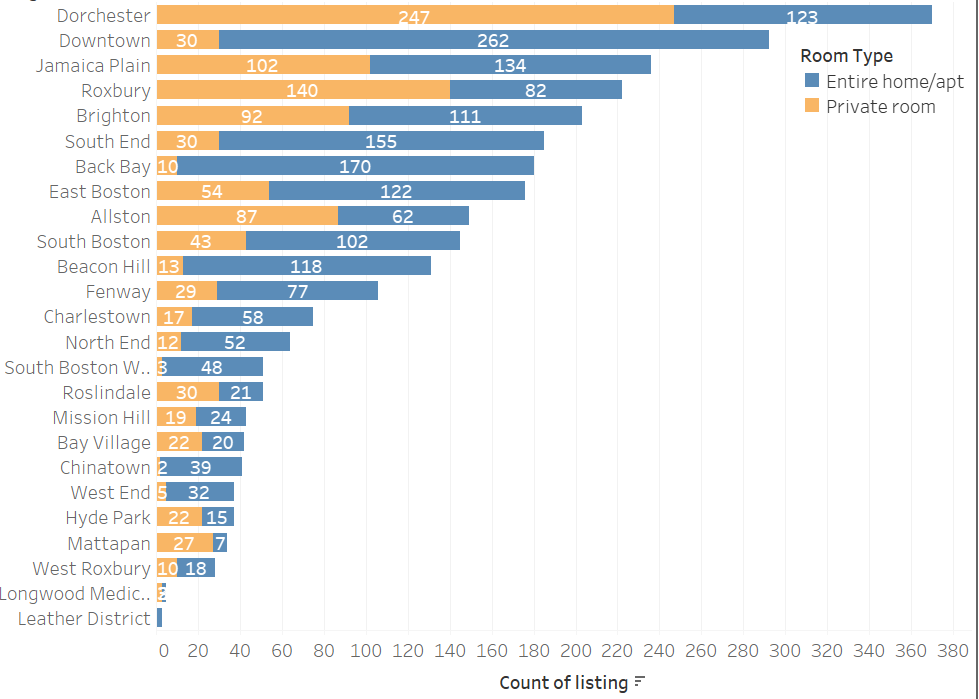

In [32]:
Image(filename='rooms_communities.png')

For Dorchester, Jamaica Plain, Roxbury, and Brighton, part of the reason they are at the top is that they occupy a large area. They are the four largest communities in the west and south-central of Boston. The neighborhood with the second most available rooms, Downtown, is not very big, but the density of rooms is huge. There are many communities in that area, and there are also many scientific research institutions, museums, and shopping malls

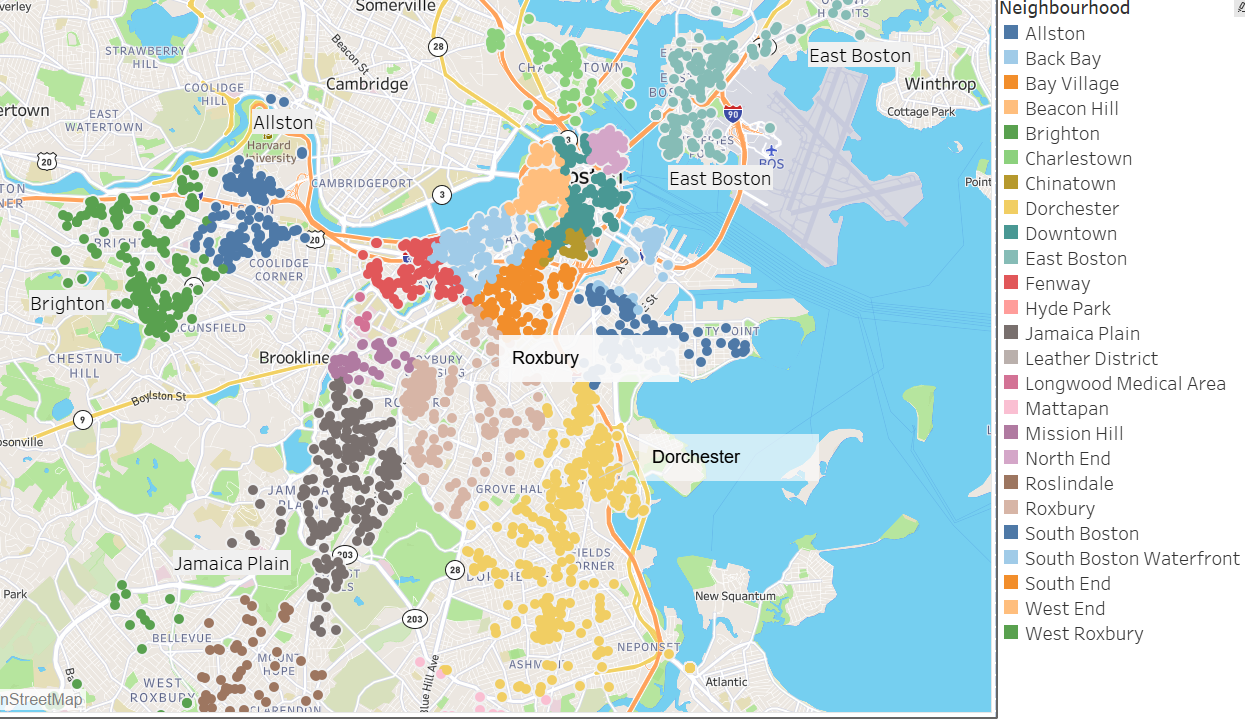

In [33]:
Image(filename='rooms_map2.png')

## 4.2 What are the differences between the amenities provided by the entires apartment and the private rooms?

The amenities in the rooms are important factors to consider.Many people intuitively think that the entire apartment will provide much more amenities than the private room. Really? 

In [37]:
##Store private room and entire apt in the separate subset for convenience. 
entire= listing_new[listing_new.room_type=="Entire home/apt"]
private= listing_new[listing_new.room_type=="Private room"]

In [38]:
# _max is the max number of amenities a room has in a room type, used in the clean_multi_vlue function
entire_max=entire["amenities_count"].max()
private_max=private["amenities_count"].max()

In [39]:
# count how many rooms have each type of amenity
entire_amenities = clean_multi_vlue(entire,"amenities",entire_max)
private_amenities = clean_multi_vlue(private,"amenities",private_max)
# merge the two data frame for comparison and rename for better readability
comp_df=entire_amenities.merge(private_amenities,how="inner",on="amenity")
comp_df.set_index('amenity', inplace=True)
comp_df.rename(columns={"amenity_counts_x":"Entire home/apt","proportion_x":"% of entire home/apt",\
                       "amenity_counts_y":"Private room","proportion_y":"% of private room"},inplace=True)
# Calculate the difference in facilities between the two types of rooms
comp_df['Diff_%_w/_amenity'] = comp_df['% of entire home/apt'] - comp_df['% of private room']
# Long term stays allowed isn't a amenity
comp_df.drop(["Long term stays allowed"],axis=0,inplace=True)
# Sort the dataframe by % of entire home/apt.
comp_df_entire=comp_df.sort_values(by="% of entire home/apt",ascending=False,inplace=False)
# Sort the dataframe by % of private rooms.
comp_df_private=comp_df.sort_values(by="% of private room",ascending=False,inplace=False)
print(('There are {} kinds of amenities'.format(comp_df.shape[0])))

There are 129 kinds of amenities


In [40]:
# Creat a data frame of comp_df sorted by % of entire home/apt for better display
comp_df_display=comp_df_entire.copy(deep=True)
# Converting decimals to percentages is better for display, but it turns int into string
comp_df_display["% of entire home/apt"]=comp_df_display["% of entire home/apt"].apply(lambda percent:'{:.2%}'.format(percent))
comp_df_display["% of private room"]=comp_df_display["% of private room"].apply(lambda percent:'{:.2%}'.format(percent))

# Creat a data frame of comp_df sorted by % of private rooms for better display
comp_df_display2=comp_df_private.copy(deep=True)
comp_df_display2["% of entire home/apt"]=comp_df_display2["% of entire home/apt"].apply(lambda percent:'{:.2%}'.format(percent))
comp_df_display2["% of private room"]=comp_df_display2["% of private room"].apply(lambda percent:'{:.2%}'.format(percent))

The following table shows the number and percentage of rooms with the top 15 most common amenities in an entire apartment( the amenities are listed in the first column). It shows that the entire apartment does win in most of the amenities. Private rooms only win in heating; Wifi, Smoke alarm, Carbon monoxide alarm and Dedicated workspace rate are basically the same.

In [41]:
comp_df_display.head(15).style.bar(subset=['Diff_%_w/_amenity'], align='mid', color=['#d65f5f', '#5fba7d'])

,Entire home/apt,% of entire home/apt,Private room,% of private room,Diff_%_w/_amenity
amenity,,,,,
Wifi,1805,97.20%,1024,97.62%,-0.004170
Kitchen,1801,96.98%,848,80.84%,0.161455
Smoke alarm,1798,96.82%,1006,95.90%,0.009220
Essentials,1736,93.48%,900,85.80%,0.076881
Hangers,1735,93.43%,903,86.08%,0.073483
Heating,1707,91.92%,1004,95.71%,-0.037877
Carbon monoxide alarm,1681,90.52%,941,89.70%,0.008179
TV,1675,90.20%,618,58.91%,0.312860
Hair dryer,1671,89.98%,742,70.73%,0.192498


The fact that the entire apartment will win is true even when we look at the top 15 most common amenities in a private room. The primary reason is that the entire room owns more amenities overall: The first 8 facilities of the entire room have a provision rate greater than 90%, while only 3 facilities of the private room have a provision rate greater than 90%

In [42]:
comp_df_display2.head(15).style.bar(subset=['Diff_%_w/_amenity'], align='mid', color=['#d65f5f', '#5fba7d'])

,Entire home/apt,% of entire home/apt,Private room,% of private room,Diff_%_w/_amenity
amenity,,,,,
Wifi,1805,97.20%,1024,97.62%,-0.004170
Smoke alarm,1798,96.82%,1006,95.90%,0.009220
Heating,1707,91.92%,1004,95.71%,-0.037877
Carbon monoxide alarm,1681,90.52%,941,89.70%,0.008179
Hangers,1735,93.43%,903,86.08%,0.073483
Essentials,1736,93.48%,900,85.80%,0.076881
Kitchen,1801,96.98%,848,80.84%,0.161455
Air conditioning,1546,83.25%,811,77.31%,0.059408
Dedicated workspace,1391,74.91%,767,73.12%,0.017885


The amenities with the most considerable difference in terms of provision rate are shown in the following table: entire rooms have an overwhelming advantage on TV. If there is only one TV in the home, it is usually installed in the living room. Free street parking is surprising. Private rooms‘ advantage in parking may be attributed to their locations, which are more friendly to parking.

In [43]:
comp_df_display_sort=comp_df_display.reindex(comp_df_display["Diff_%_w/_amenity"].abs().sort_values(ascending=False).index)
comp_df_display_sort.head(10).style.bar(subset=['Diff_%_w/_amenity'], align='mid', color=['#d65f5f', '#5fba7d'])

,Entire home/apt,% of entire home/apt,Private room,% of private room,Diff_%_w/_amenity
amenity,,,,,
TV,1675,90.20%,618,58.91%,0.312860
Private entrance,783,42.16%,145,13.82%,0.283421
Free street parking,427,22.99%,478,45.57%,-0.225731
Iron,1656,89.18%,726,69.21%,0.199673
Elevator,461,24.82%,56,5.34%,0.194866
Hair dryer,1671,89.98%,742,70.73%,0.192498
Dishwasher,932,50.19%,340,32.41%,0.177767
Dryer,1443,77.71%,635,60.53%,0.171721
Bed linens,1157,62.30%,482,45.95%,0.163563


## 4.3 How much does one person have to pay in each community? Is an entire apartment more expensive?

Price is a significant consideration when choosing a room type. Many people intuitively think that the entire apartment will be more expensive than the private room. Really? 

Comparison of the accommodation cost is tricky. It is not fair to directly compare the price of a large house that can accommodate 6 people with a small room that can only accommodate 1. So I created a new metric: the average price each person needs to pay - price/the number of people that can be accommodated, to compare the prices of different listings.

As you can see, the average price of the entire apartment is indeed much more expensive than the private room. However, please pay attention to the variance; it is very large. This means that the price of each type of room spans a very large range, and we better break them down into different communities.

In [45]:
price_type=listing_new.groupby(by="room_type")["avg_price_per_person"].agg([np.mean,np.std,np.max,np.min]).reset_index()
price_type.rename(columns={"room_type":"Room type","mean":"Average price","std":"Standard deviation",\
                       "amax":"Maximum","amin":"Minimum"},inplace=True)
price_type

,Room type,Average price,Standard deviation,Maximum,Minimum
0,Entire home/apt,52.235638,31.133409,295.0,11.0
1,Private room,43.567247,27.482772,333.0,10.2


In different communities, the average price comparison between the entire apartments and private rooms is very different. For example, although the average price of the entire apartment is indeed much more expensive than the private room overall, in the West End community, the private room is nearly twice as expensive as the entire apartment! Among the 25 communities, the entire apartments are more expensive in 14 communities (the community names are displayed in blue), and the private rooms are more expensive in 11 communities (the community names are displayed in red).

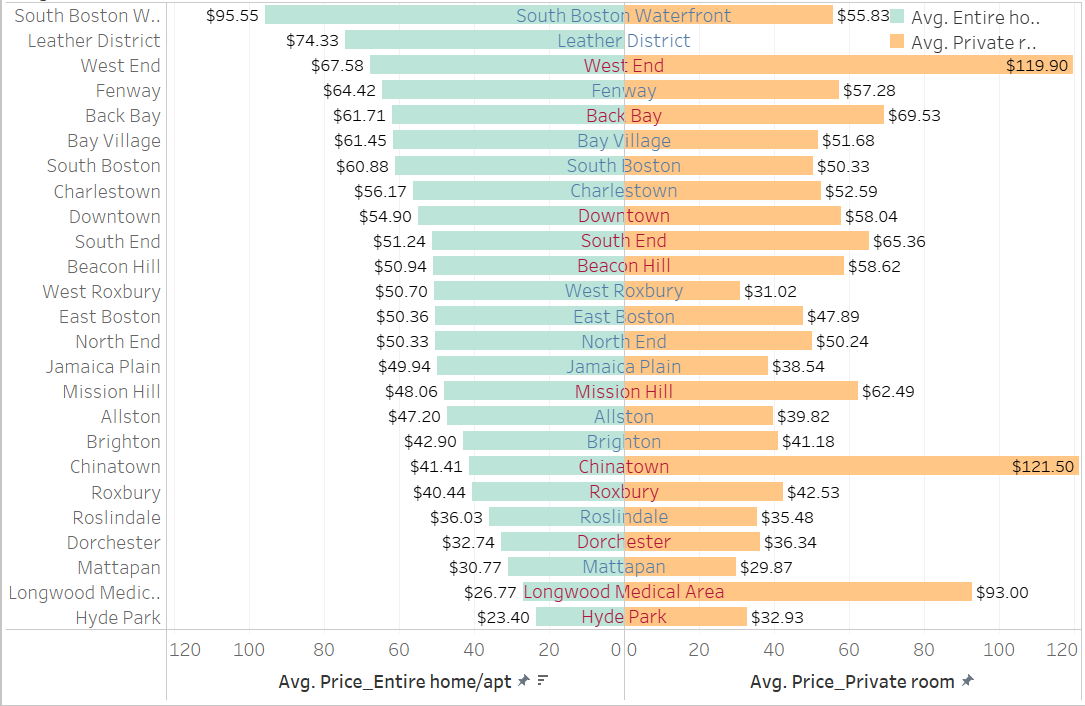

In [17]:
Image(filename='rooms_price1.png')

Even in the same community, the price of the same type of rooms varies significantly among individuals since there are too many factors affecting the price： whether the location is convenient, whether it has been recently renovated, and how many facilities are in the room. Therefore, the average price of each community is only a rough guide.

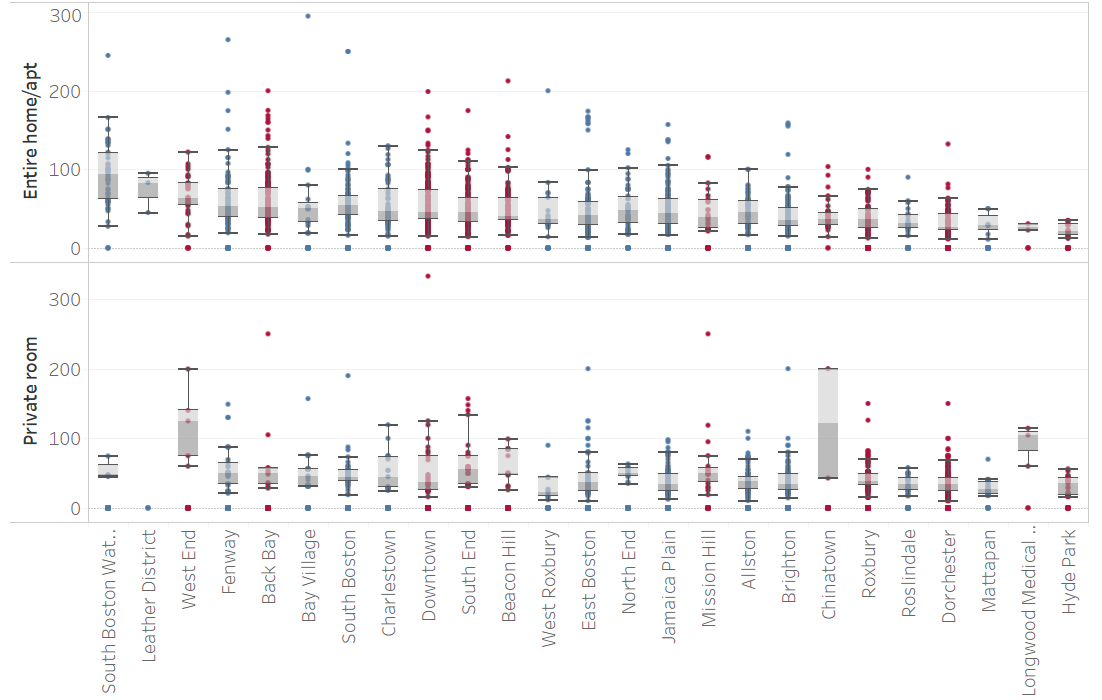

In [18]:
Image(filename='rooms_price2.png')

## 4.4 How much more does a person need to pay to book a private room with a private bathroom?

If people choose private rooms, private bathrooms will significantly impact the experience. As a result, many people want to know how much more they need to pay for a private bathroom. I compared both the list price and the average price per person (the list price adjusted by the number of accommodates) and found that whether there is a private bathroom has a significant impact on price.

The following results show that guests need to pay $42.19 more to book a private room with a private bathroom, under 95% confidence level, the confidence interval is [31.56, 52.82], which is pretty high.


In [36]:
bath_lm=smf.ols("price~private_bath",data=private).fit()
bath_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     60.68
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.61e-14
Time:                        11:23:17   Log-Likelihood:                -5743.3
No. Observations:                1049   AIC:                         1.149e+04
Df Residuals:                    1047   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.9010      1.907     36.136      0.000      65.160      72.642
private_bath    42.1913      5.416      7.790      0.000      31.563      52.819
==============================================================================
Omnibus:                     1299.338   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234951.835
Skew:                           6.215   Prob(JB):                         0.00
Kurtosis:                      75.256   Cond. No.                         3.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we focus on the average price per person, people need to pay $9.4 more to live in a private room with a private bathroom, under 95% confidence level, the confidence interval is [4.38, 14.42].

In [37]:
bath_lm2=smf.ols("avg_price_per_person~private_bath",data=private).fit()
bath_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     avg_price_per_person   R-squared:                       0.013
Model:                              OLS   Adj. R-squared:                  0.012
Method:                   Least Squares   F-statistic:                     13.48
Date:                  Mon, 19 Apr 2021   Prob (F-statistic):           0.000253
Time:                          11:26:57   Log-Likelihood:                -4957.2
No. Observations:                  1049   AIC:                             9918.
Df Residuals:                      1047   BIC:                             9928.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.4023      0.901     47.050      0.000      40.634      44.171
private_bath     9.4001      2.560      3.672      0.000       4.377      14.424
==============================================================================
Omnibus:                      873.051   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25887.988
Skew:                           3.673   Prob(JB):                         0.00
Kurtosis:                      26.202   Cond. No.                         3.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fact that the entire apartment will win is true even when we look at the top 15 most common amenities in an private room

In [94]:
listing_new.to_csv('listing.csv',index=False)